# 0 IMPORTS

In [ ]:
from google.colab import drive
mount_point = '/content/gdrive'
drive.mount(mount_point)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install osmnx 
!pip install -U bokeh==2.2
!pip install -q holoviews
!pip install momepy
!pip install Rtree
!pip install squarify
!pip install folium==0.12.1 mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bokeh-2.2.0-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.2.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import osmnx as ox 
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import momepy
from collections import Counter
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

from shapely.geometry import Polygon
from shapely.geometry import Point
import squarify
import folium

from folium.plugins import StripePattern


Output hidden; open in https://colab.research.google.com to view.

# 5 VISUALIZATION

In [ ]:
#DATASETS
cluster_No = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/sevenClustersNo.json", "r") 
cluster_No = gpd.read_file(cluster_No)
cluster_No['ID'] = cluster_No.index
cluster_No

,Cluster,geometry,ID
0,1,"POLYGON ((139.56767 35.69346, 139.56786 35.693...",0
1,1,"POLYGON ((139.56767 35.69416, 139.56787 35.693...",1
2,1,"POLYGON ((139.56767 35.69485, 139.56787 35.694...",2
3,1,"POLYGON ((139.56767 35.69693, 139.56787 35.696...",3
4,1,"POLYGON ((139.56768 35.69762, 139.56787 35.697...",4
...,...,...,...
1275,7,"POLYGON ((139.57609 35.70593, 139.57629 35.705...",1275
1276,7,"POLYGON ((139.57489 35.70801, 139.57509 35.707...",1276
1277,7,"POLYGON ((139.57430 35.70835, 139.57449 35.708...",1277
1278,7,"POLYGON ((139.57909 35.70627, 139.57929 35.705...",1278


In [ ]:

cluster_No['Cluster'] = cluster_No['Cluster'].astype('int')
cluster_No.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Cluster   1280 non-null   int64   
 1   geometry  1280 non-null   geometry
 2   ID        1280 non-null   int64   
dtypes: geometry(1), int64(2)
memory usage: 30.1 KB


In [ ]:

#DATASETS
cluster_grid = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/sevenClusters.json", "r") 
cluster_grid = gpd.read_file(cluster_grid)
cluster_grid['ID'] = cluster_grid.index
cluster_grid['Cluster'] = cluster_grid['Cluster'].astype(str)
cluster_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Cluster   1280 non-null   object  
 1   geometry  1280 non-null   geometry
 2   ID        1280 non-null   int64   
dtypes: geometry(1), int64(1), object(1)
memory usage: 30.1+ KB


In [ ]:

#DATASETS
neoTokyoNetwork = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/neoTokyoNetwork.json", "r") 
neoTokyoNetwork = gpd.read_file(neoTokyoNetwork)
neoTokyoNetwork

,UUID,geometry
0,657aaefd-f586-4c53-860d-cf50fb777184,"LINESTRING (139.56872 35.69396, 139.59082 35.6..."
1,48ed4117-7386-4e39-a519-dfe973295582,"LINESTRING (139.57549 35.71207, 139.57708 35.7..."
2,3d5e51b7-42de-4d6d-8deb-465d6c8777b9,"LINESTRING (139.59010 35.69421, 139.58790 35.6..."
3,b49be049-8bb9-44ef-8a66-dd66aea3897c,"LINESTRING (139.57383 35.71205, 139.57366 35.7..."
4,83fb530f-8061-4394-9c90-cbd8dbd751e7,"LINESTRING (139.57826 35.69407, 139.57971 35.6..."
...,...,...
2386,9d58f3bb-1019-4903-8ecc-2b5ff083220b,"LINESTRING (139.57483 35.70818, 139.57422 35.7..."
2387,a0c87f9b-ab55-44e0-8b4d-73c28caa3817,"LINESTRING (139.57641 35.70683, 139.57510 35.7..."
2388,624918e7-7e43-43bd-8503-5693c0c8cd7e,"LINESTRING (139.57844 35.70617, 139.57770 35.7..."
2389,4fbcb137-2697-48c8-942c-aab567a0ac92,"LINESTRING (139.57681 35.70419, 139.57784 35.7..."


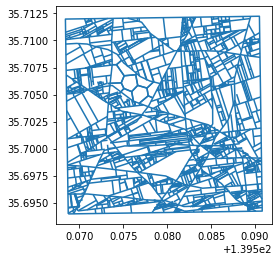

In [ ]:
# let's create some maps

neoTokyoNetwork.plot()
plt.show()

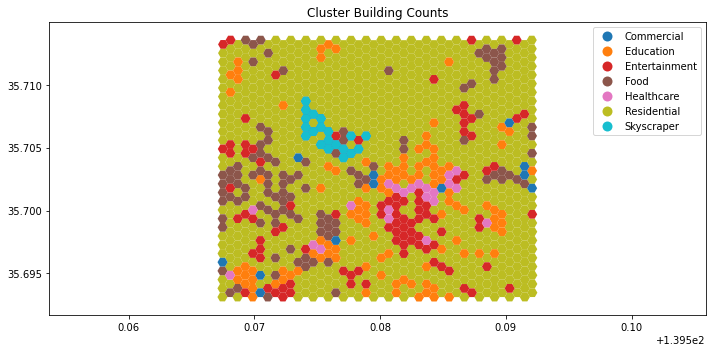

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
cluster_grid.plot(column='Cluster', legend=True, ax=ax1)
ax1.set_title('Cluster Building Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
basetilemap = cluster_grid[['ID','geometry','Cluster',]]
print(basetilemap.head(2))
basetilemap.info()

   ID                                           geometry      Cluster
0   0  POLYGON ((139.56767 35.69346, 139.56786 35.693...  Residential
1   1  POLYGON ((139.56767 35.69416, 139.56787 35.693...  Residential
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        1280 non-null   int64   
 1   geometry  1280 non-null   geometry
 2   Cluster   1280 non-null   object  
dtypes: geometry(1), int64(1), object(1)
memory usage: 30.1+ KB


In [ ]:
cluster_grid

,Cluster,geometry,ID
0,Residential,"POLYGON ((139.56767 35.69346, 139.56786 35.693...",0
1,Residential,"POLYGON ((139.56767 35.69416, 139.56787 35.693...",1
2,Residential,"POLYGON ((139.56767 35.69485, 139.56787 35.694...",2
3,Residential,"POLYGON ((139.56767 35.69693, 139.56787 35.696...",3
4,Residential,"POLYGON ((139.56768 35.69762, 139.56787 35.697...",4
...,...,...,...
1275,Skyscraper,"POLYGON ((139.57609 35.70593, 139.57629 35.705...",1275
1276,Skyscraper,"POLYGON ((139.57489 35.70801, 139.57509 35.707...",1276
1277,Skyscraper,"POLYGON ((139.57430 35.70835, 139.57449 35.708...",1277
1278,Skyscraper,"POLYGON ((139.57909 35.70627, 139.57929 35.705...",1278


In [ ]:
#%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/cluster_grid.geojson'
cluster_grid.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
neoTokyoNetwork = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/neoTokyoNetwork.json", "r") 
neoTokyoNetwork = gpd.read_file(neoTokyoNetwork)

In [ ]:
type(cluster_grid)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Initialize folium map.
sample_map = map_feat0 = folium.Map([35.7031413, 139.5803077],tiles="cartodbdark_matter", zoom_start=15, max_zoom=18, min_zoom=12)
sample_map

In [ ]:
# We import the required library:
from branca.element import Template, MacroElement

In [ ]:
cluster_grid['Cluster'] = cluster_grid['Cluster'].astype(str)
cluster_grid

,Cluster,geometry,ID
0,Residential,"POLYGON ((139.56767 35.69346, 139.56786 35.693...",0
1,Residential,"POLYGON ((139.56767 35.69416, 139.56787 35.693...",1
2,Residential,"POLYGON ((139.56767 35.69485, 139.56787 35.694...",2
3,Residential,"POLYGON ((139.56767 35.69693, 139.56787 35.696...",3
4,Residential,"POLYGON ((139.56768 35.69762, 139.56787 35.697...",4
...,...,...,...
1275,Skyscraper,"POLYGON ((139.57609 35.70593, 139.57629 35.705...",1275
1276,Skyscraper,"POLYGON ((139.57489 35.70801, 139.57509 35.707...",1276
1277,Skyscraper,"POLYGON ((139.57430 35.70835, 139.57449 35.708...",1277
1278,Skyscraper,"POLYGON ((139.57909 35.70627, 139.57929 35.705...",1278


In [ ]:
# Create a Map instance
m = folium.Map(location=[35.7031413, 139.5803077], tiles = 'cartodbpositron', zoom_start=15, control_scale=True)

folium.Choropleth(geo_data = cluster_grid, 
                  data = cluster_grid, 
                  columns=['Cluster','ID'], 
                  key_on='feature.properties.Cluster', 
                  fill_color='RdYlBu', 
                  line_color='white',
                  line_weight=0,
                  legend_name= 'Cluster number').add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = cluster_grid,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ID','Cluster'],
        aliases=['ID','Cluster Category'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)

m

In [ ]:
lines_gjson = folium.features.GeoJson(neoTokyoNetwork, name = "network")

In [ ]:
#DATASETS
pointHeights = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/generatedGeojsons/pointHeights.json", "r") 
pointHeights = gpd.read_file(pointHeights)

pointHeights['Height'] = pointHeights['Height'].astype(float)
pointHeights = pointHeights.round({'Height': 1})

pointHeights.info()
pointHeights

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Height    1298 non-null   float64 
 1   geometry  1298 non-null   geometry
dtypes: float64(1), geometry(1)
memory usage: 20.4 KB


,Height,geometry
0,1.0,POINT (139.58149 35.70955)
1,7.8,POINT (139.58232 35.70721)
2,67.2,POINT (139.58230 35.71026)
3,25.3,POINT (139.57176 35.70010)
4,5.8,POINT (139.57897 35.69490)
...,...,...
1293,19.5,POINT (139.58843 35.70814)
1294,35.1,POINT (139.58791 35.70361)
1295,80.1,POINT (139.58854 35.70699)
1296,179.5,POINT (139.58762 35.70267)


In [ ]:
pointHeights = folium.features.GeoJson(pointHeights, 
                                       marker = folium.CircleMarker(radius = 5, # Radius in metres
                                           weight = 0, #outline weight
                                           fill_color = '#0000FF', 
                                           fill_opacity = 0.8),
                                       name = "Building Heights",
                                       tooltip = folium.GeoJsonTooltip(fields = ['Height'],
                                                    aliases=['Height: '],
                                                    style = ("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
                                                    sticky = True
                    )

                    )

In [ ]:
from pygeos.creation import linestrings


map1 = folium.Map(location=[35.7031413, 139.5803077],tiles="cartodbdark_matter", zoom_start=17, control_scale=True)

# Set up Choropleth map
folium.Choropleth(
geo_data=cluster_grid,
data=cluster_grid,
columns=['Cluster',"ID"],
key_on="feature.properties.Cluster",
fill_color='YlGnBu_r',
fill_opacity=.5,
line_opacity=0.5,
legend_name="Cluster Category",
smooth_factor=0,
Highlight= True,
line_color = "#de268b",
name = "Cluster Cat",
show=False,
overlay=True,
nan_fill_color = "#575757"

).add_to(map1)



folium.Marker(location=[35.70290675,139.57765029818236], popup = "NEOTOKYO",  draggable = True, icon=folium.DivIcon(html=f"""
            <div style="font-family: Tahoma; font-size: 60px; color: red">NEOTOKYO</div>""")).add_to(map1)



style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}




                                
NIL = folium.features.GeoJson(
    data = cluster_grid,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ID','Cluster'],
        aliases=['ID','Cluster Category'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

map1.add_child(NIL)
map1.keep_in_front(NIL)
map1.keep_in_front(pointHeights)
lines_gjson.add_to(map1)
pointHeights.add_to(map1)



folium.LayerControl().add_to(map1)

map1

#map_feat1.save('/tmp/demo.html')

Output hidden; open in https://colab.research.google.com to view.